In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/data.xlsx - Sheet1.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [23]:
df.shape

(3998, 39)

In [24]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [25]:
# Remove the 0th index column
df = df.drop(df.columns[0], axis=1)

# Convert 'Date of Joining' (DOJ) and 'Date of Leaving' (DOL) to datetime objects
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOL'] = pd.to_datetime(df['DOL'].replace('present', '2024-02-17'))

# B. Validating 0 or -1
columns_to_validate = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
df[columns_to_validate] = df[columns_to_validate].replace(-1, 0)

# C. Collapsing Categories
# Identify the top 10 most frequent categories in the 'Specialization' column
top_specializations = df['Specialization'].value_counts().nlargest(10).index
# Categorize any specializations beyond the top 10 as 'Other'
df.loc[~df['Specialization'].isin(top_specializations), 'Specialization'] = 'Other'

# Data Binning
# Define bins for salary data
salary_bins = [0, 50000, 100000, 150000, 200000, 250000]
# Define bin labels
salary_labels = ['< 50K', '50K - 100K', '100K - 150K', '150K - 200K', '200K - 250K']
# Create a new column 'Salary_Binned' to store binned salary data
df['Salary_Binned'] = pd.cut(df['Salary'], bins=salary_bins, labels=salary_labels)

# 1. Age Calculation
df['Age'] = 2015 - pd.to_datetime(df['DOB']).dt.year

# 2. Tenure Calculation
df['Tenure'] = (df['DOL'] - df['DOJ']).dt.days

# 3. Graduation Year Filtering
df = df[df['GraduationYear'] < df['DOJ'].dt.year]


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 0 to 3997
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1629 non-null   int64         
 1   Salary                 1629 non-null   float64       
 2   DOJ                    1629 non-null   datetime64[ns]
 3   DOL                    1629 non-null   datetime64[ns]
 4   Designation            1629 non-null   object        
 5   JobCity                1629 non-null   object        
 6   Gender                 1629 non-null   object        
 7   DOB                    1629 non-null   object        
 8   10percentage           1629 non-null   float64       
 9   10board                1629 non-null   object        
 10  12graduation           1629 non-null   int64         
 11  12percentage           1629 non-null   float64       
 12  12board                1629 non-null   object        
 13  Col

In [27]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary_Binned,Age,Tenure
0,203097,420000.0,2012-06-01,2024-02-17,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,NaN,25,4278
1,579905,500000.0,2013-09-01,2024-02-17,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,...,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,NaN,26,3821
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,2/27/91 0:00,78.00,cbse,...,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,150K - 200K,24,365
10,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,6/24/89 0:00,88.60,mp board bhopal,...,0,0,0.0464,0.8128,0.0914,0.17980,0.0284,NaN,26,1461
13,431800,200000.0,2014-01-01,2024-02-17,qa analyst,Gurgaon,m,10/23/90 0:00,60.80,cbse,...,0,0,0.3555,0.0328,-0.5980,-0.29020,-1.2354,150K - 200K,25,3699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,204287,480000.0,2012-02-01,2024-02-17,senior systems engineer,Hyderabad,f,9/4/89 0:00,88.00,0,...,233,0,0.6646,0.3448,0.3817,-1.34780,0.8183,NaN,26,4399
3992,344407,800000.0,2014-04-01,2015-04-01,manager,Rajkot,m,6/22/90 0:00,73.00,0,...,0,480,0.3555,-0.9033,0.9623,0.64983,-0.4229,NaN,25,365
3993,47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,...,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194,NaN,28,366
3995,355888,320000.0,2013-07-01,2024-02-17,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,NaN,24,3883


Provides a concise summary of statistical measures (mean, median, standard deviation, etc.) and visualizations (histogram and boxplot) for each numeric column.
Specifically handles the 'Salary' column differently by printing outliers separately.

Salary
Skew : 5.8


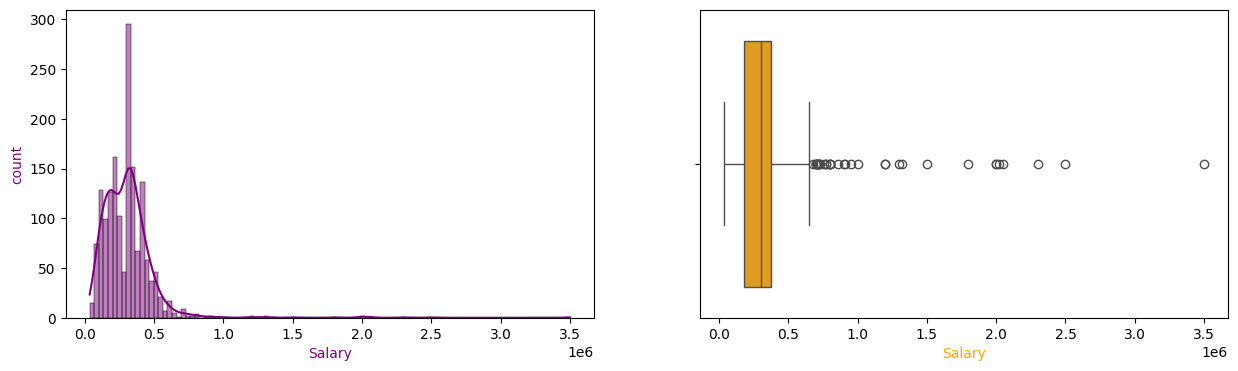

10percentage
Skew : -0.53


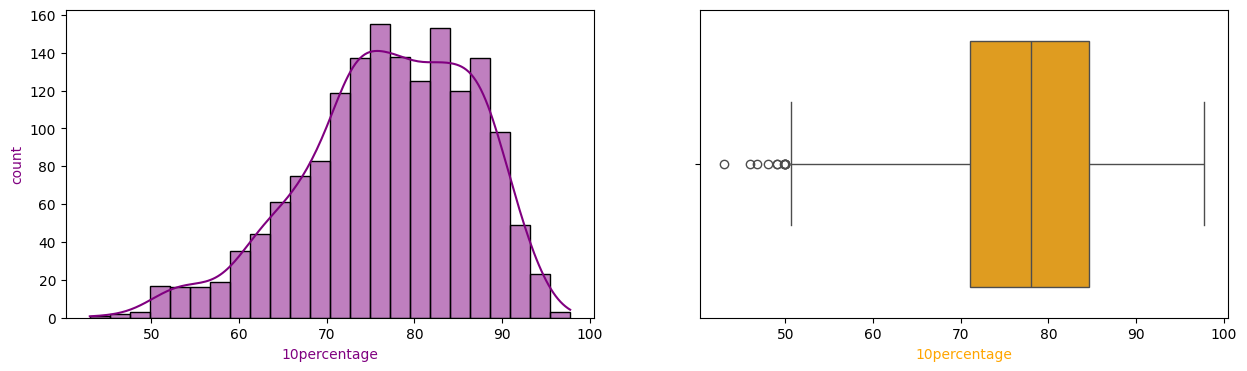

12graduation
Skew : -0.92


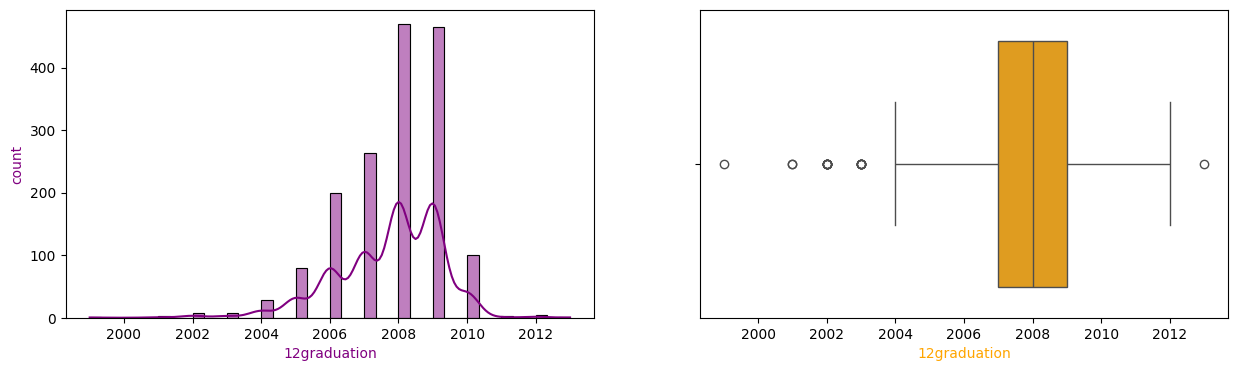

collegeGPA
Skew : -0.48


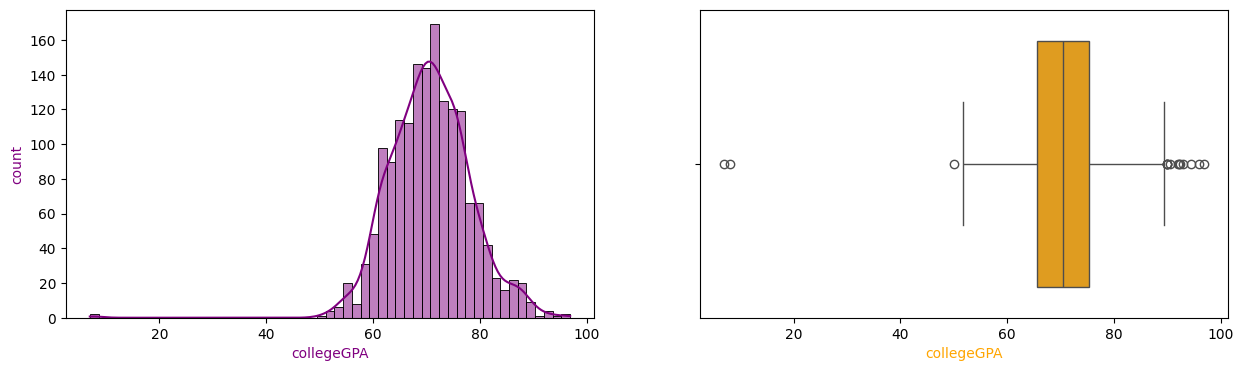

English
Skew : 0.17


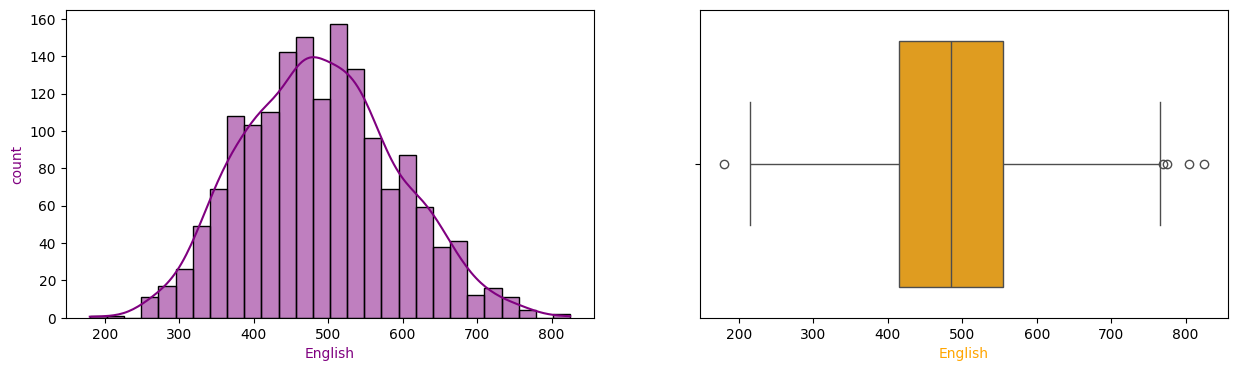

Logical
Skew : -0.14


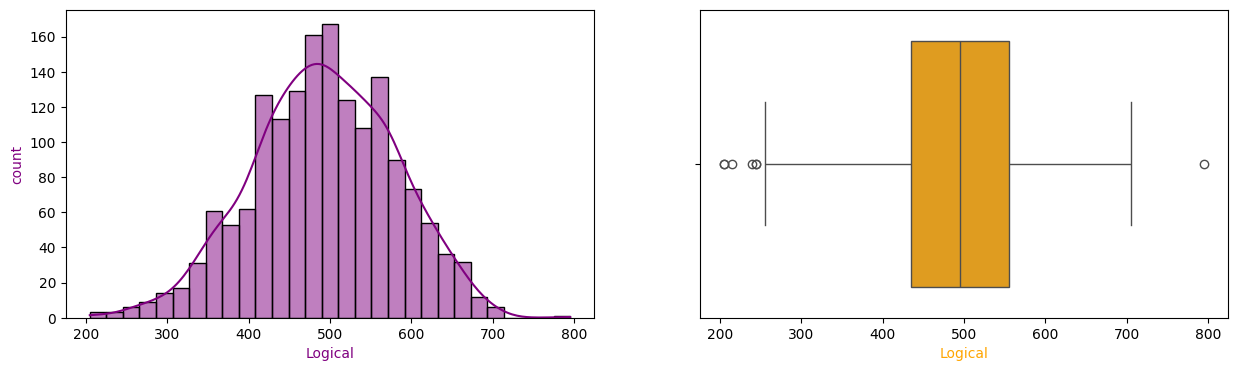

Quant
Skew : -0.11


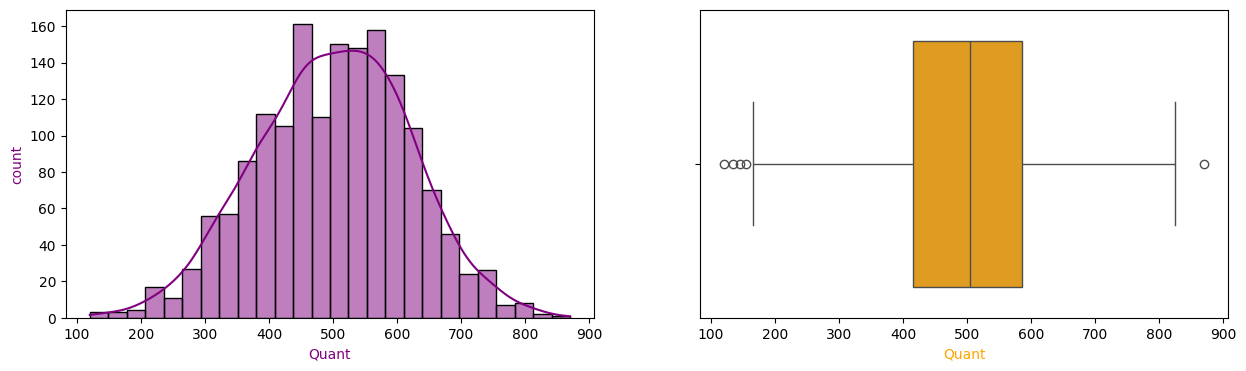

Domain
Skew : -1.82


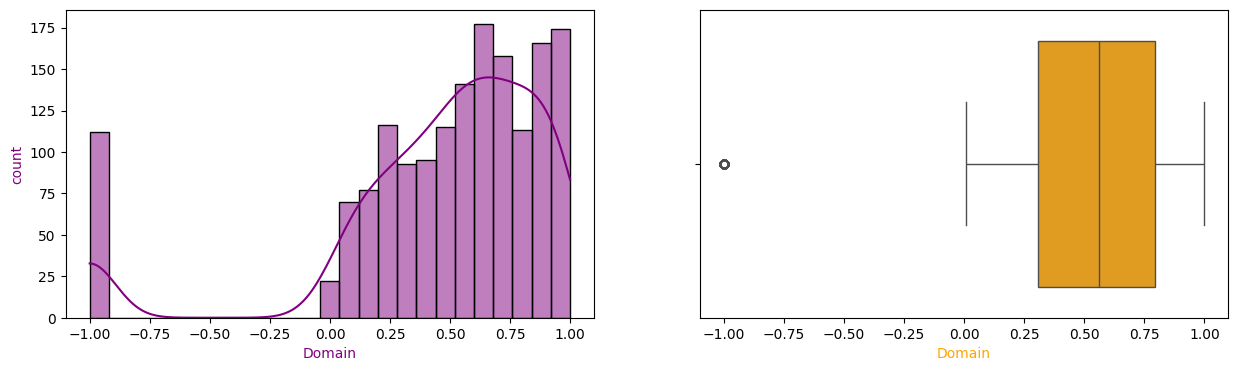

conscientiousness
Skew : -0.59


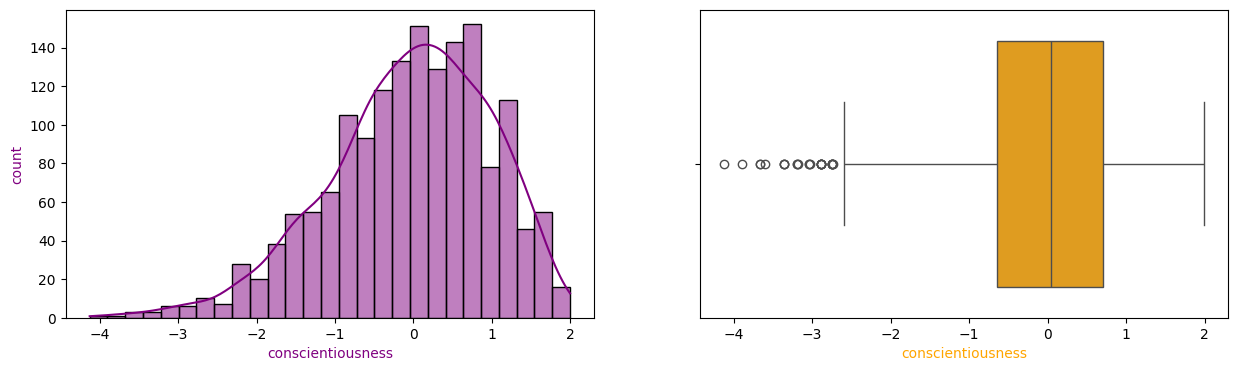

agreeableness
Skew : -1.23


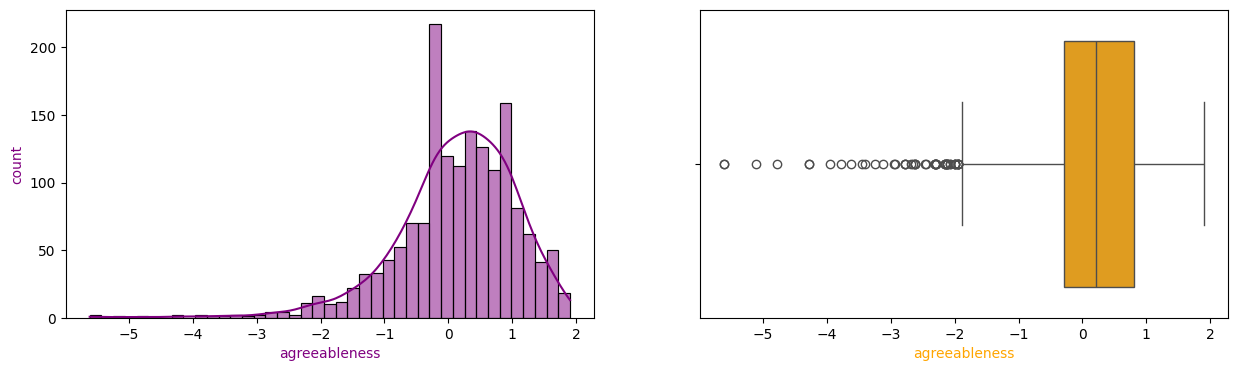

extraversion
Skew : -0.51


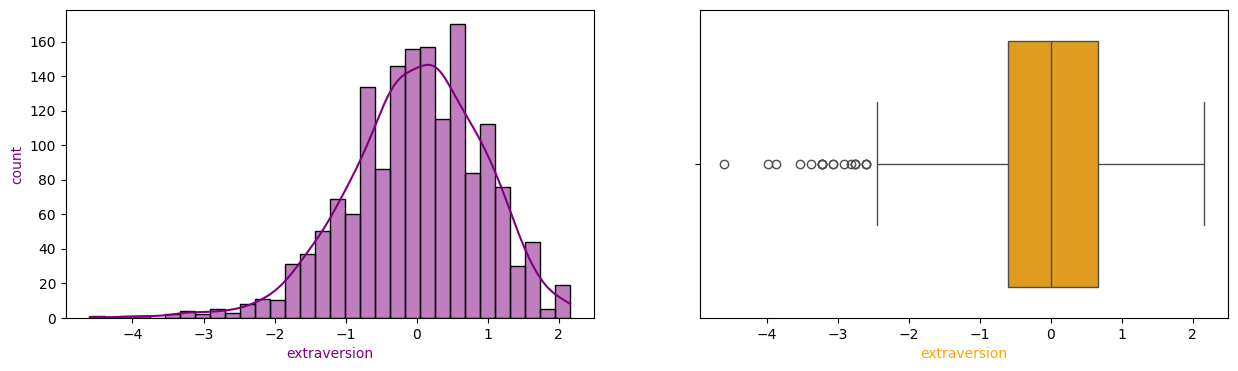

nueroticism
Skew : 0.12


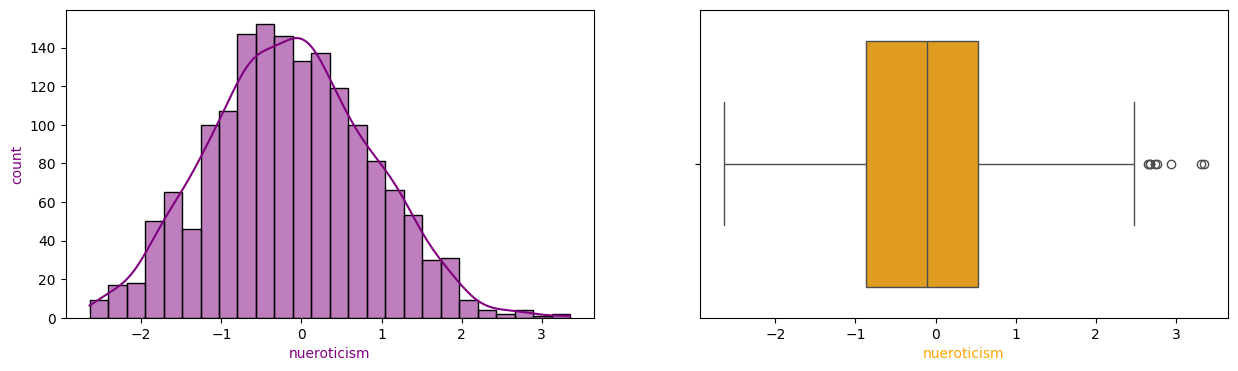

openess_to_experience
Skew : -1.43


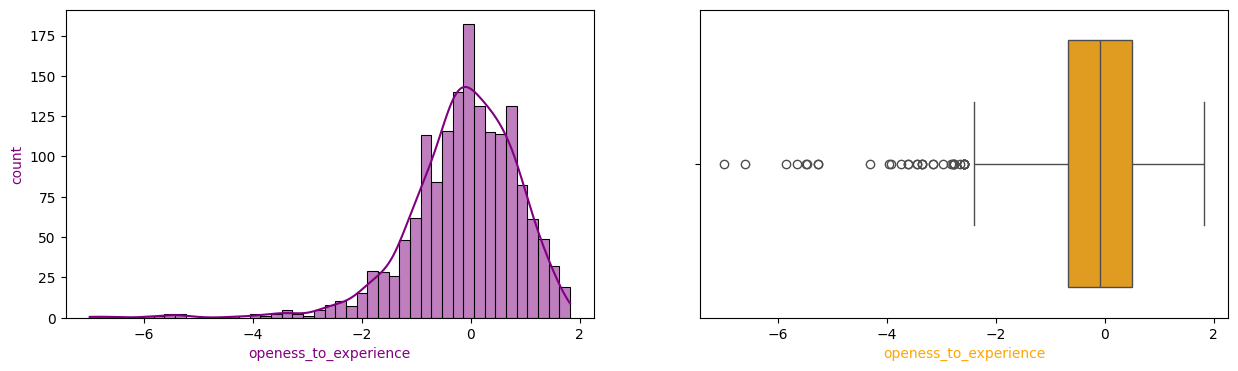

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Salary', '10percentage', '12graduation', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], color='purple', kde=True)
    plt.ylabel('count', color='purple')
    plt.xlabel(col, color='purple')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')
    plt.xlabel(col, color='orange')
    plt.show()

<ipython-input-29-e86d58735d43>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.values, y=top_10_values.index, ax=axes[i], palette='Set1')  # Exchanging x-axis and y-axis
<ipython-input-29-e86d58735d43>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, ax=axes[i], palette='Set1')
<ipython-input-29-e86d58735d43>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, ax=axes[i], palette='Set1')


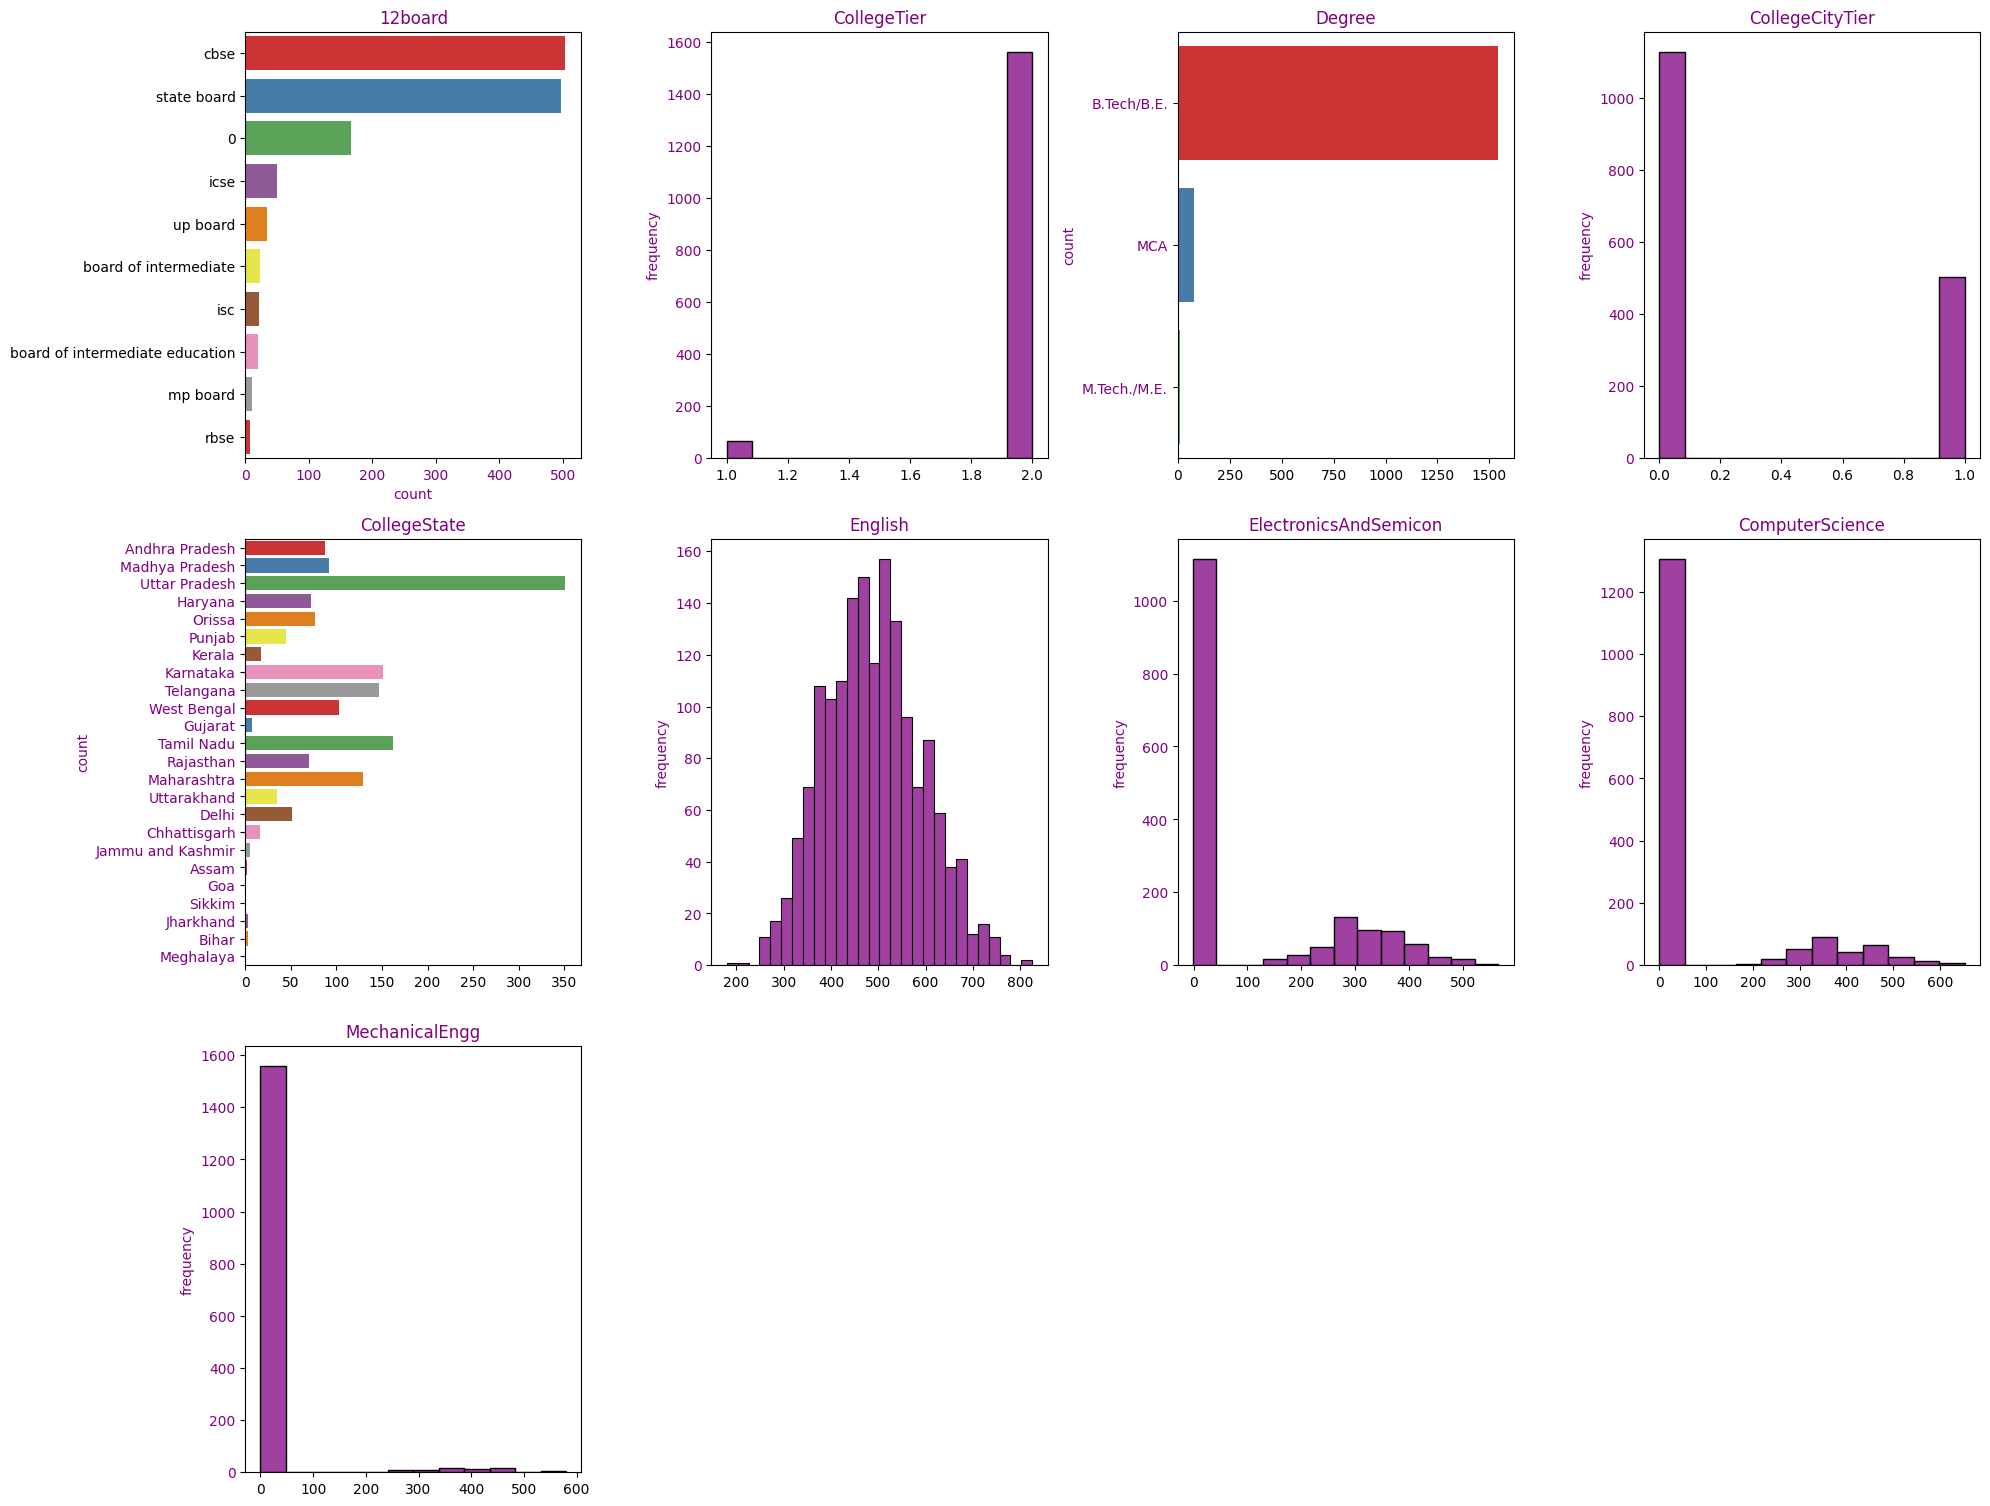

In [29]:
indices = [12, 14, 15, 19, 20, 22, 27, 28, 29]
num_rows = 4
num_cols = 4
total_plots = min(len(indices), num_rows * num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

axes = axes.flatten()

column_names = df.columns

# Loop through the indices and plot the data
for i, index in enumerate(indices[:total_plots]):
    data = df.iloc[:, index]  # Selecting the data for the specific index
    column_name = column_names[index]

    if index == 12:
        top_10_values = data.value_counts().nlargest(10)
        sns.barplot(x=top_10_values.values, y=top_10_values.index, ax=axes[i], palette='Set1')  # Exchanging x-axis and y-axis
        axes[i].set_xlabel('count', color='purple')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelcolor='purple')
    else:
        # Filter out -1 values for columns with numerical data
        if data.dtype == 'int64' or data.dtype == 'float64':
            sns.histplot(data, ax=axes[i], color='purple')  # Include -1 values for numerical columns
            axes[i].set_ylabel('frequency', color='purple')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='y', labelcolor='purple')
        else:
            sns.countplot(data, ax=axes[i], palette='Set1')
            axes[i].set_ylabel('count', color='purple')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='y', labelcolor='purple')

    axes[i].set_title(f'{column_name}', color='purple')

for j in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


***In the below we handle the "-1" values, whereas in the above we show the plots considering "-1" but we remove the categories which are having 80% of the same and which are irrevalent to the data*** We intrepret the "-1" as the person did not take the exam

<ipython-input-15-824ebad1b79a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_values.values, y=top_10_values.index, ax=axes[i], palette='Set1')  # Exchanging x-axis and y-axis


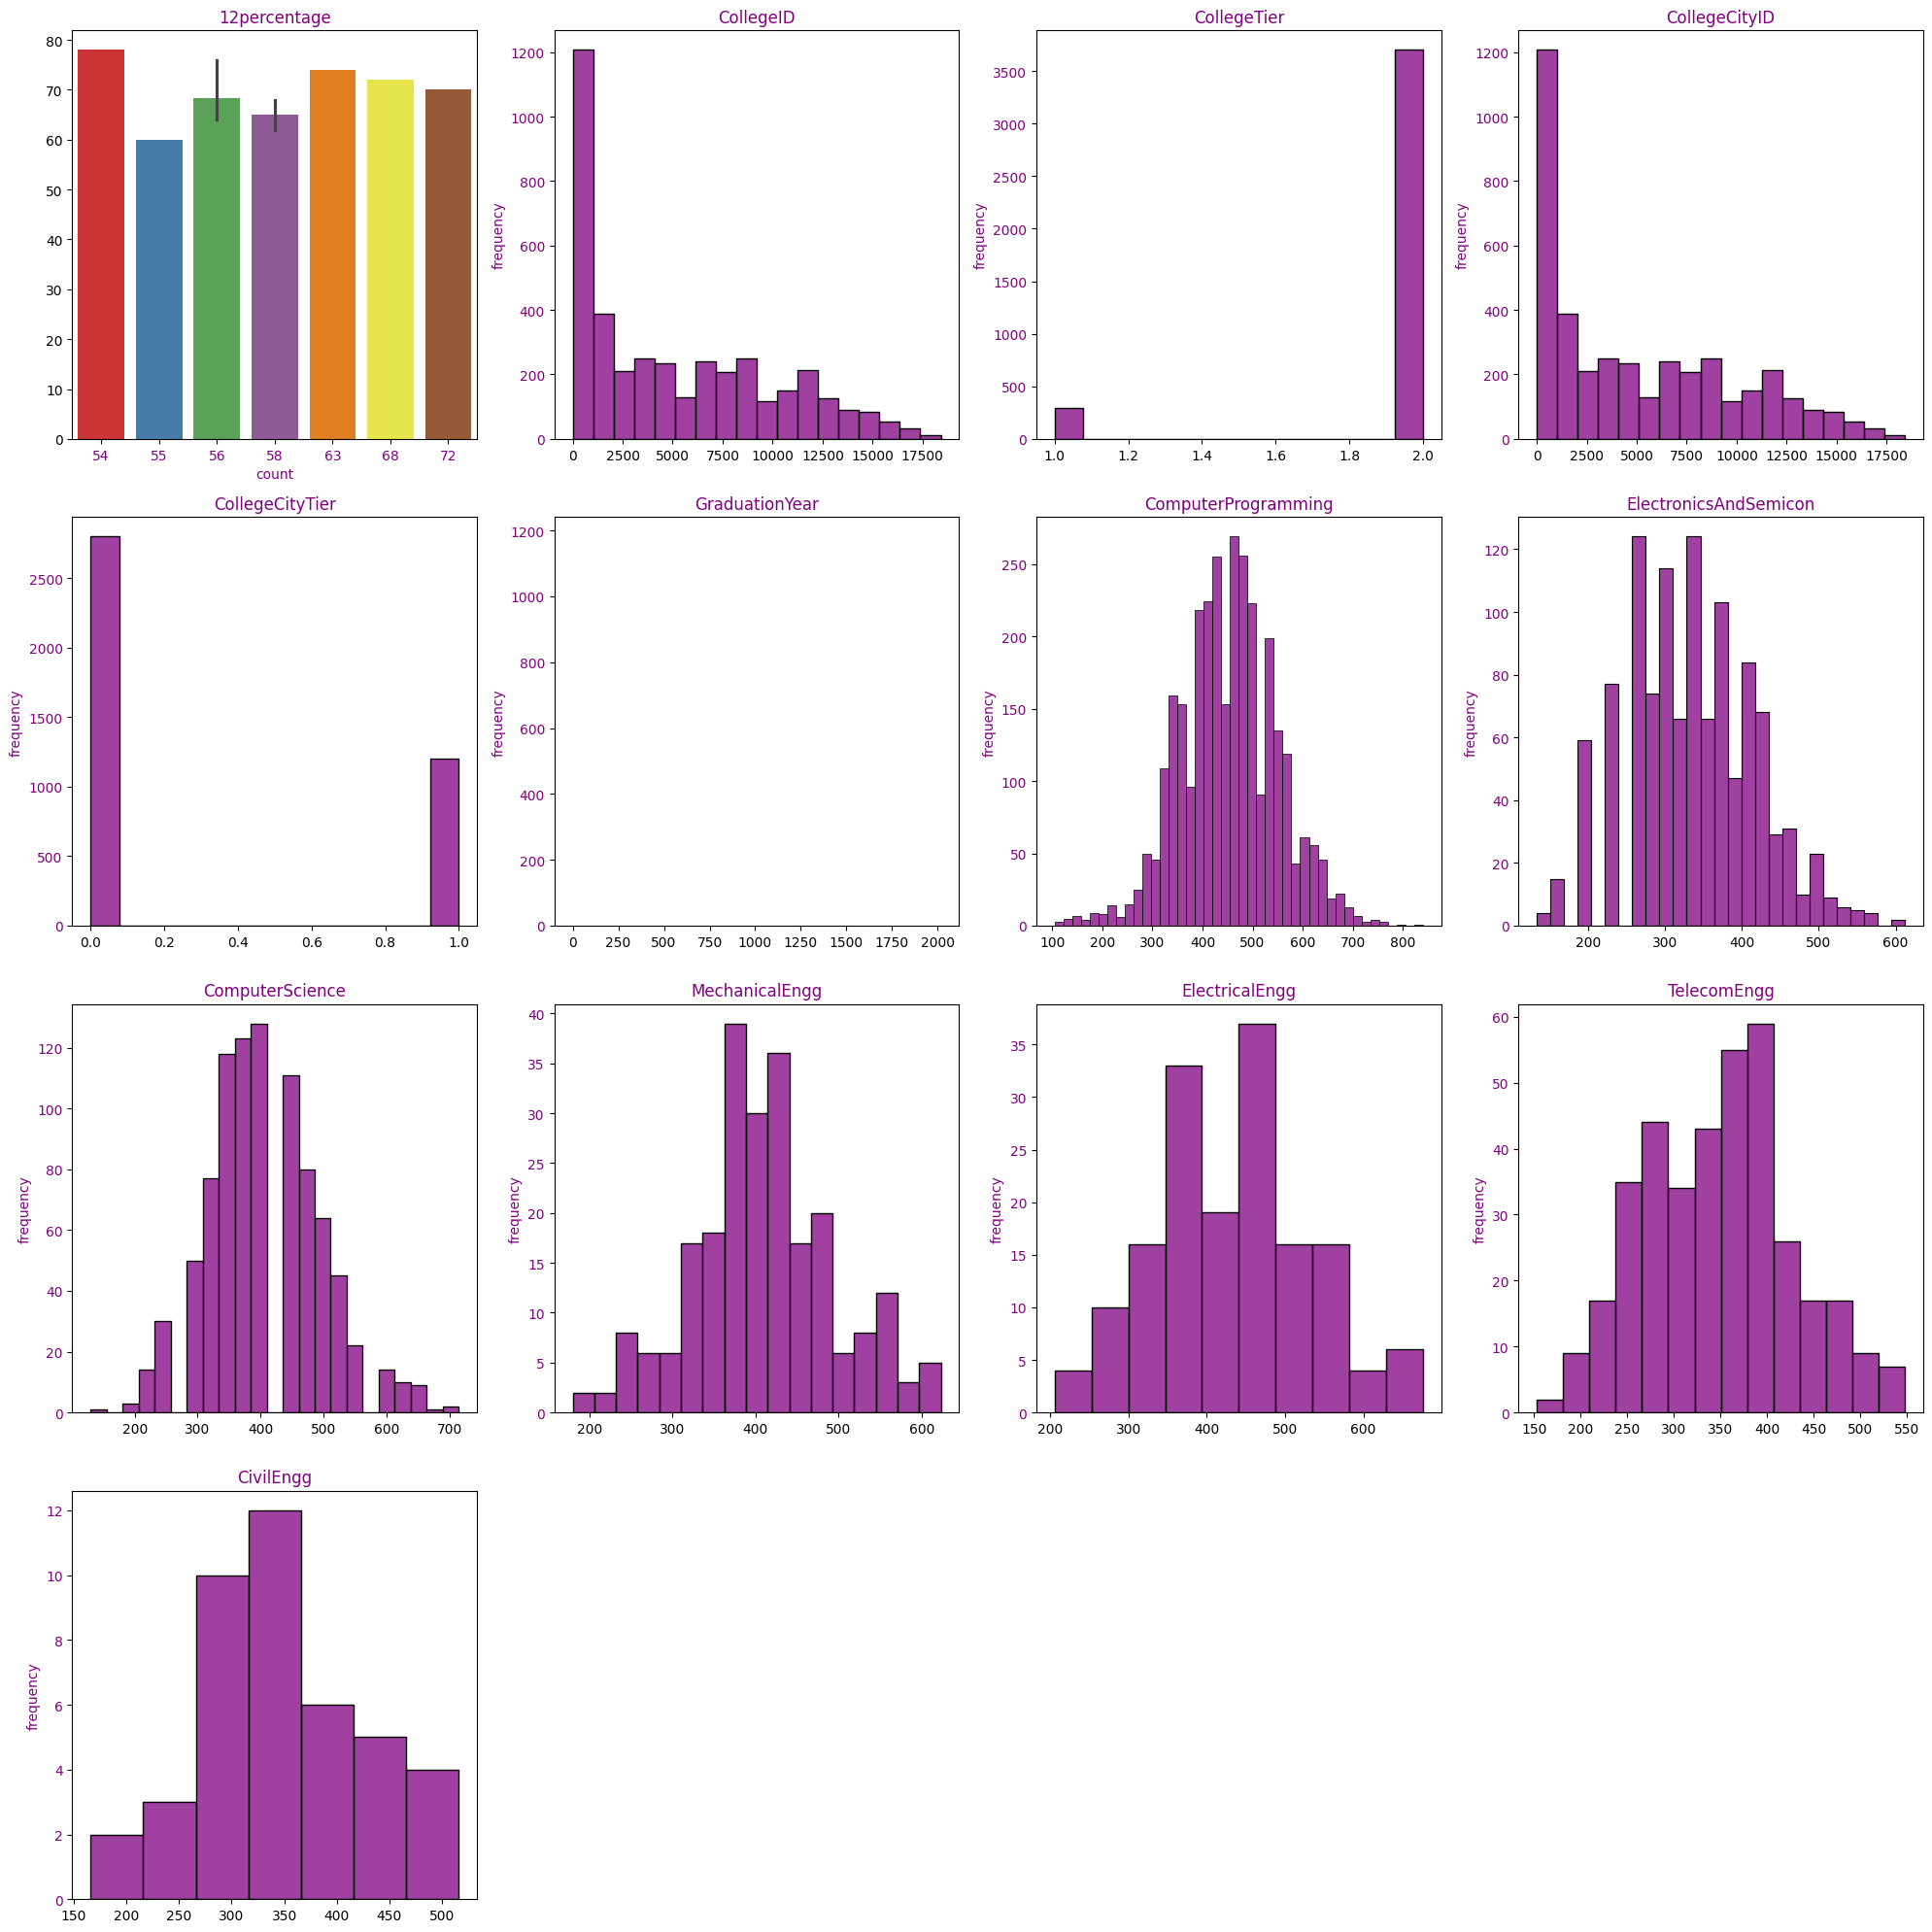

In [ ]:
indices = [12, 14, 15, 19, 20, 22, 27, 28, 29, 30, 31, 32, 33]
num_rows = 4
num_cols = 4

total_plots = min(len(indices), num_rows * num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

axes = axes.flatten()

column_names = df.columns

for i, index in enumerate(indices[:total_plots]):
    data = df.iloc[:, index]  # Selecting the data for the specific index
    column_name = column_names[index]

    # For index 12, show only the top 10 values with exchanged x-axis and y-axis
    if index == 12:
        top_10_values = data.value_counts().nlargest(10)
        sns.barplot(x=top_10_values.values, y=top_10_values.index, ax=axes[i], palette='Set1')  # Exchanging x-axis and y-axis
        axes[i].set_xlabel('count', color='purple')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelcolor='purple')
    else:
        # Filter out -1 values for columns with numerical data
        if data.dtype == 'int64' or data.dtype == 'float64':
            data = data[data != -1]
            sns.histplot(data, ax=axes[i], color='purple')
            axes[i].set_ylabel('frequency', color='purple')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='y', labelcolor='purple')
        else:
            sns.countplot(data, ax=axes[i], palette='Set1')
            axes[i].set_ylabel('count', color='purple')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='y', labelcolor='purple')

    axes[i].set_title(f'{column_name}', color='purple')

for j in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

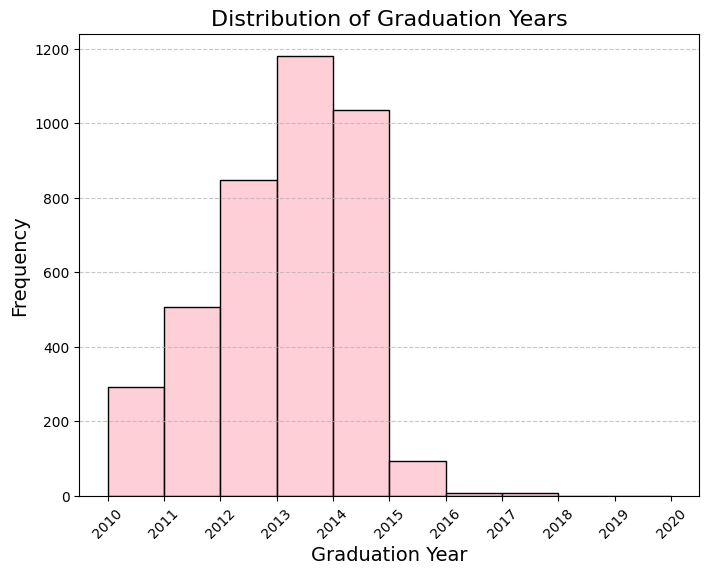

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the range of years
years = range(2010, 2021)

# Plotting the histogram for graduation year with yearly bins
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.histplot(df['GraduationYear'], bins=years, color='pink')  # Set the color to pink
plt.title('Distribution of Graduation Years', fontsize=16)
plt.xlabel('Graduation Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(years, rotation=45)
plt.show()


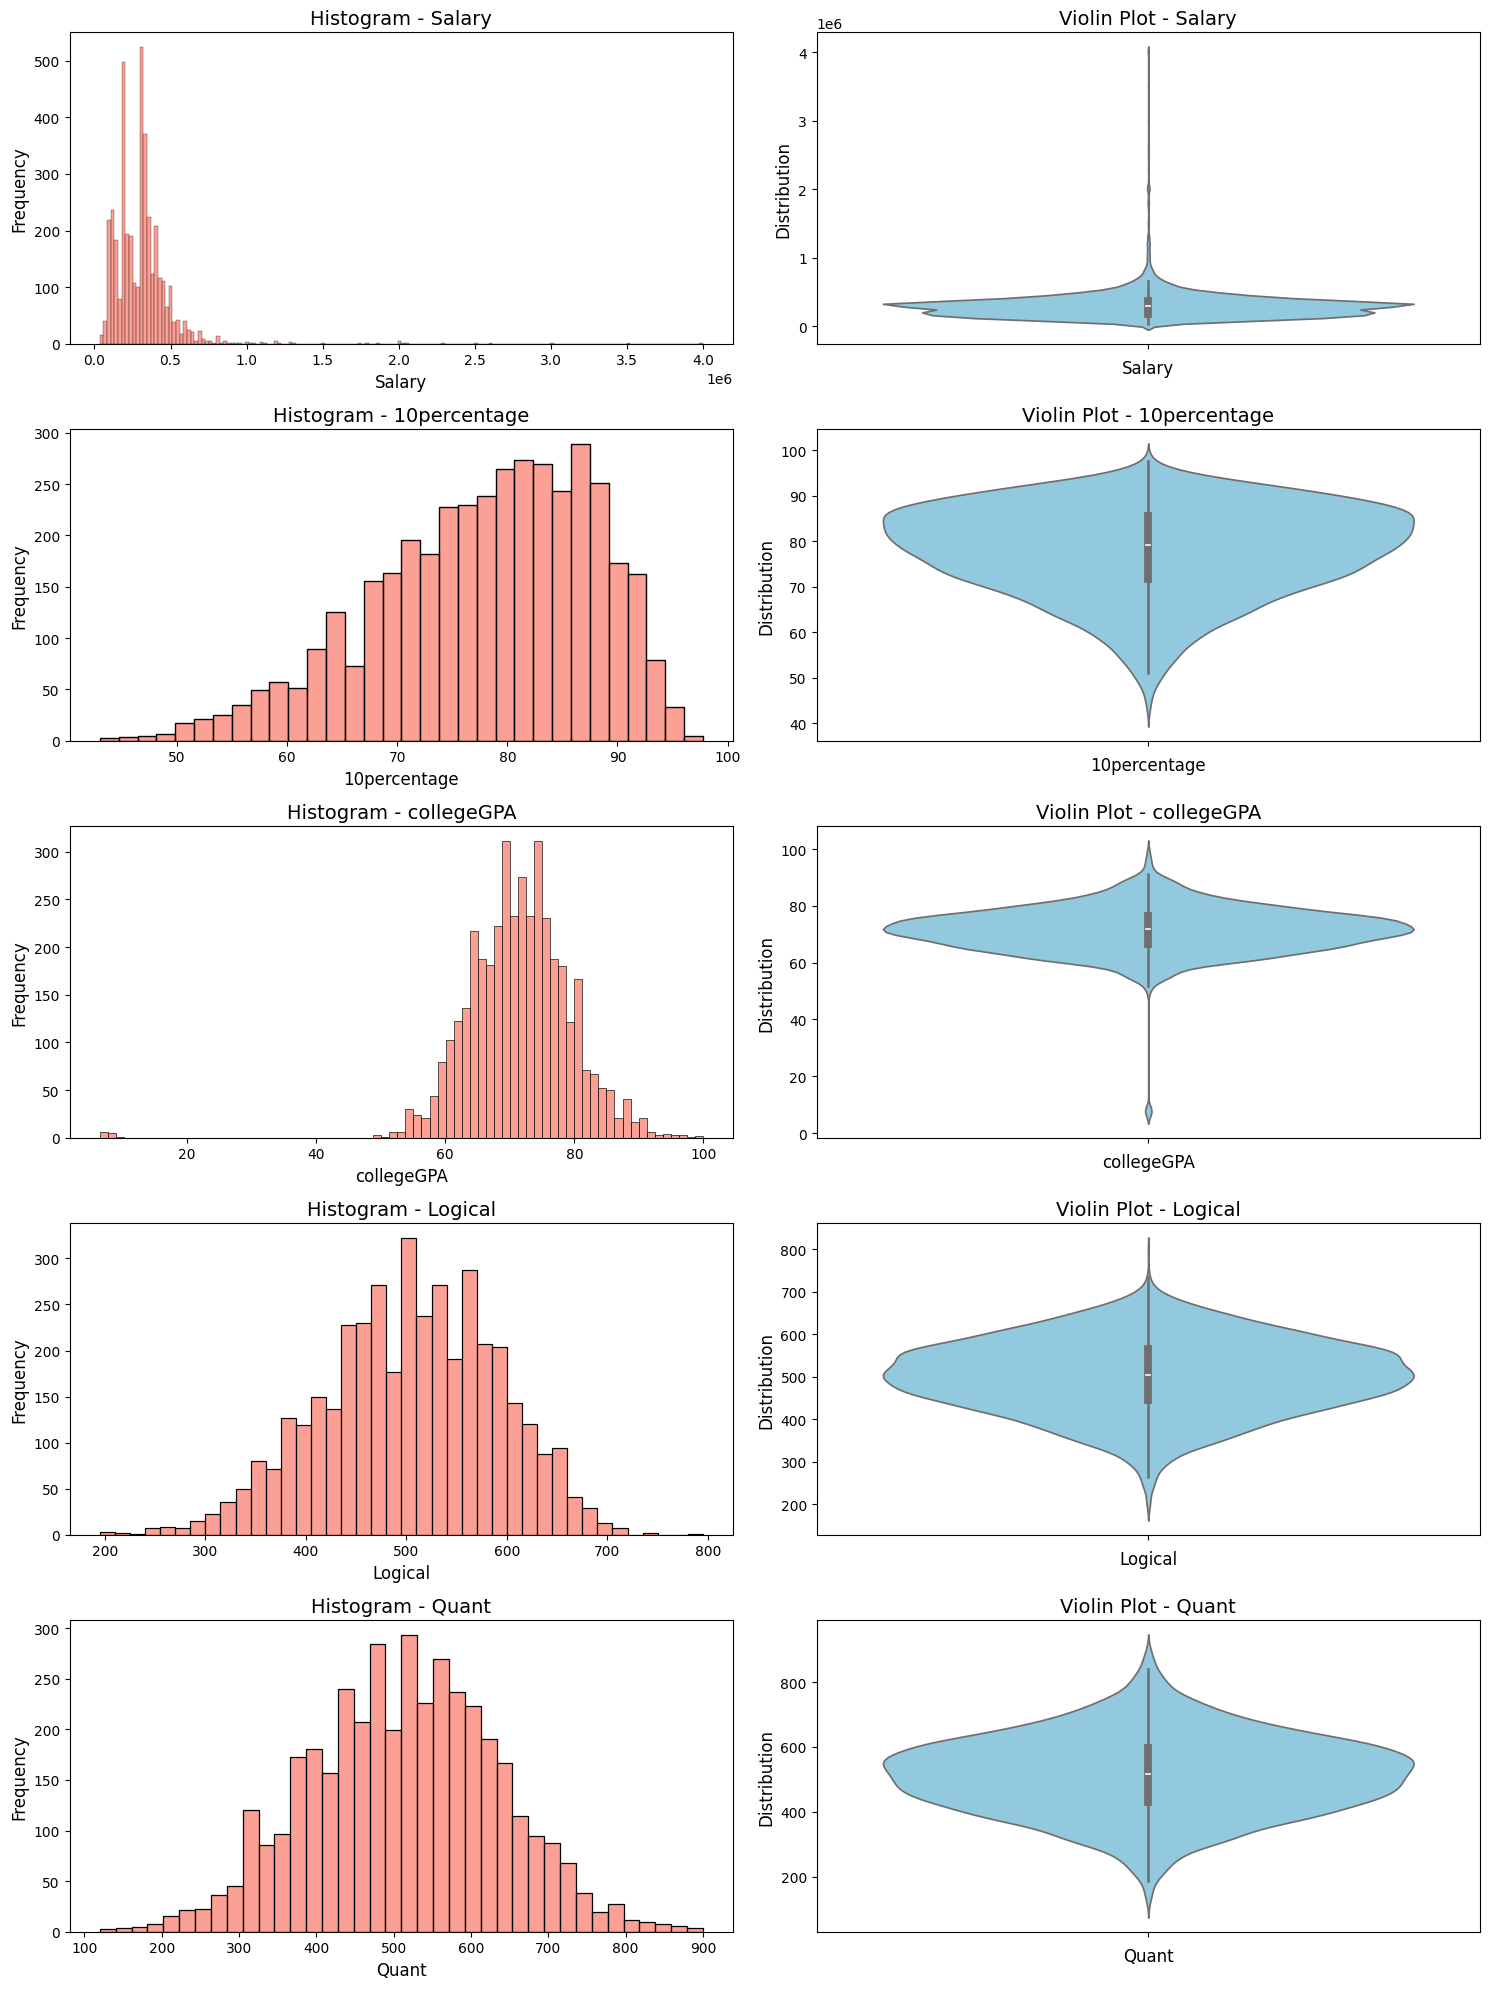

In [ ]:

numerical_columns = ['Salary', '10percentage', 'collegeGPA', 'Logical', 'Quant']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Plot unique univariate visualizations for each numerical column
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(data=df, x=column, ax=axes[i, 0], color='salmon')
    axes[i, 0].set_title(f'Histogram - {column}', fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)

    # Violin plot
    sns.violinplot(data=df, y=column, ax=axes[i, 1], color='skyblue')
    axes[i, 1].set_title(f'Violin Plot - {column}', fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=12)
    axes[i, 1].set_ylabel('Distribution', fontsize=12)
plt.tight_layout()
plt.show()


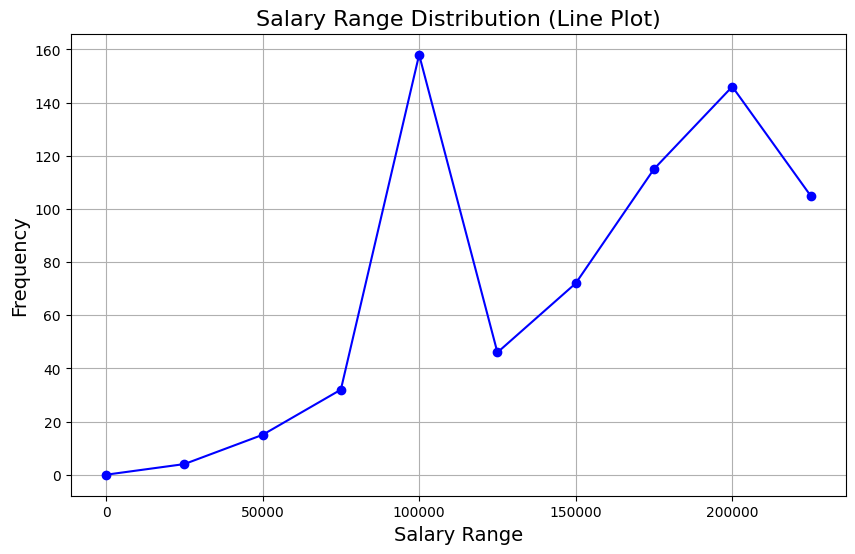

In [31]:
salary_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000]
salary_counts, _ = np.histogram(df['Salary'], bins=salary_bins)

plt.figure(figsize=(10, 6))
plt.plot(salary_bins[:-1], salary_counts, marker='o', linestyle='-', color='blue')  # Customize the color here

# labels and title
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Salary Range Distribution (Line Plot)', fontsize=16)

# Show grid
plt.grid(True)
plt.show()


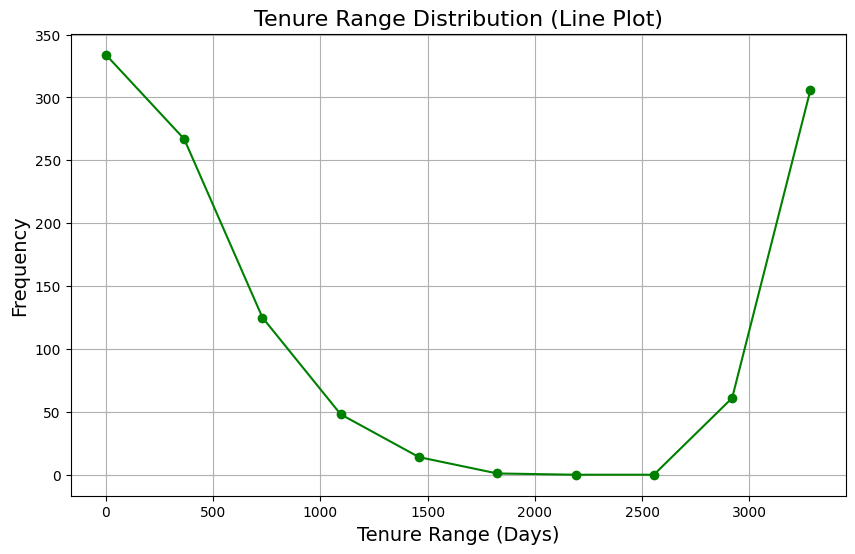

In [33]:
tenure_bins = [0, 365, 730, 1095, 1460, 1825, 2190, 2555, 2920, 3285, 3650]
tenure_counts, _ = np.histogram(df['Tenure'], bins=tenure_bins)

plt.figure(figsize=(10, 6))
plt.plot(tenure_bins[:-1], tenure_counts, marker='o', linestyle='-', color='green')  # Customize the color here

# labels and title
plt.xlabel('Tenure Range (Days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Tenure Range Distribution (Line Plot)', fontsize=16)

# Show grid
plt.grid(True)
plt.show()


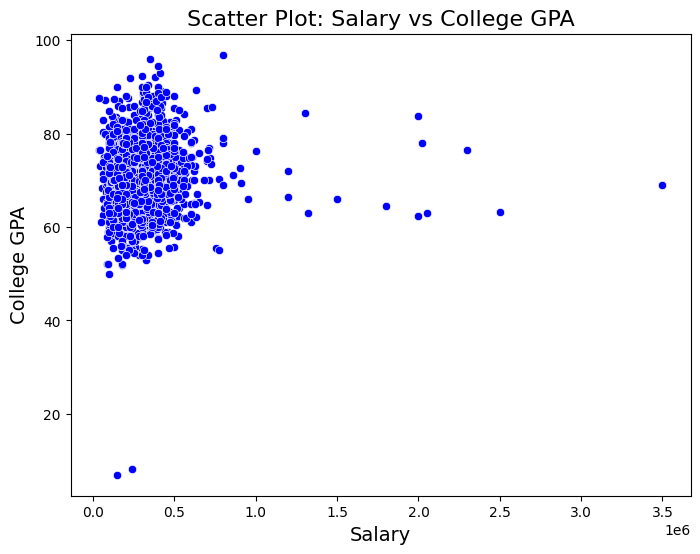

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatter plot between 'Salary' and 'collegeGPA'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Salary', y='collegeGPA', data=df, color='blue')  # Customize color if needed
plt.title('Scatter Plot: Salary vs College GPA', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('College GPA', fontsize=14)
plt.show()


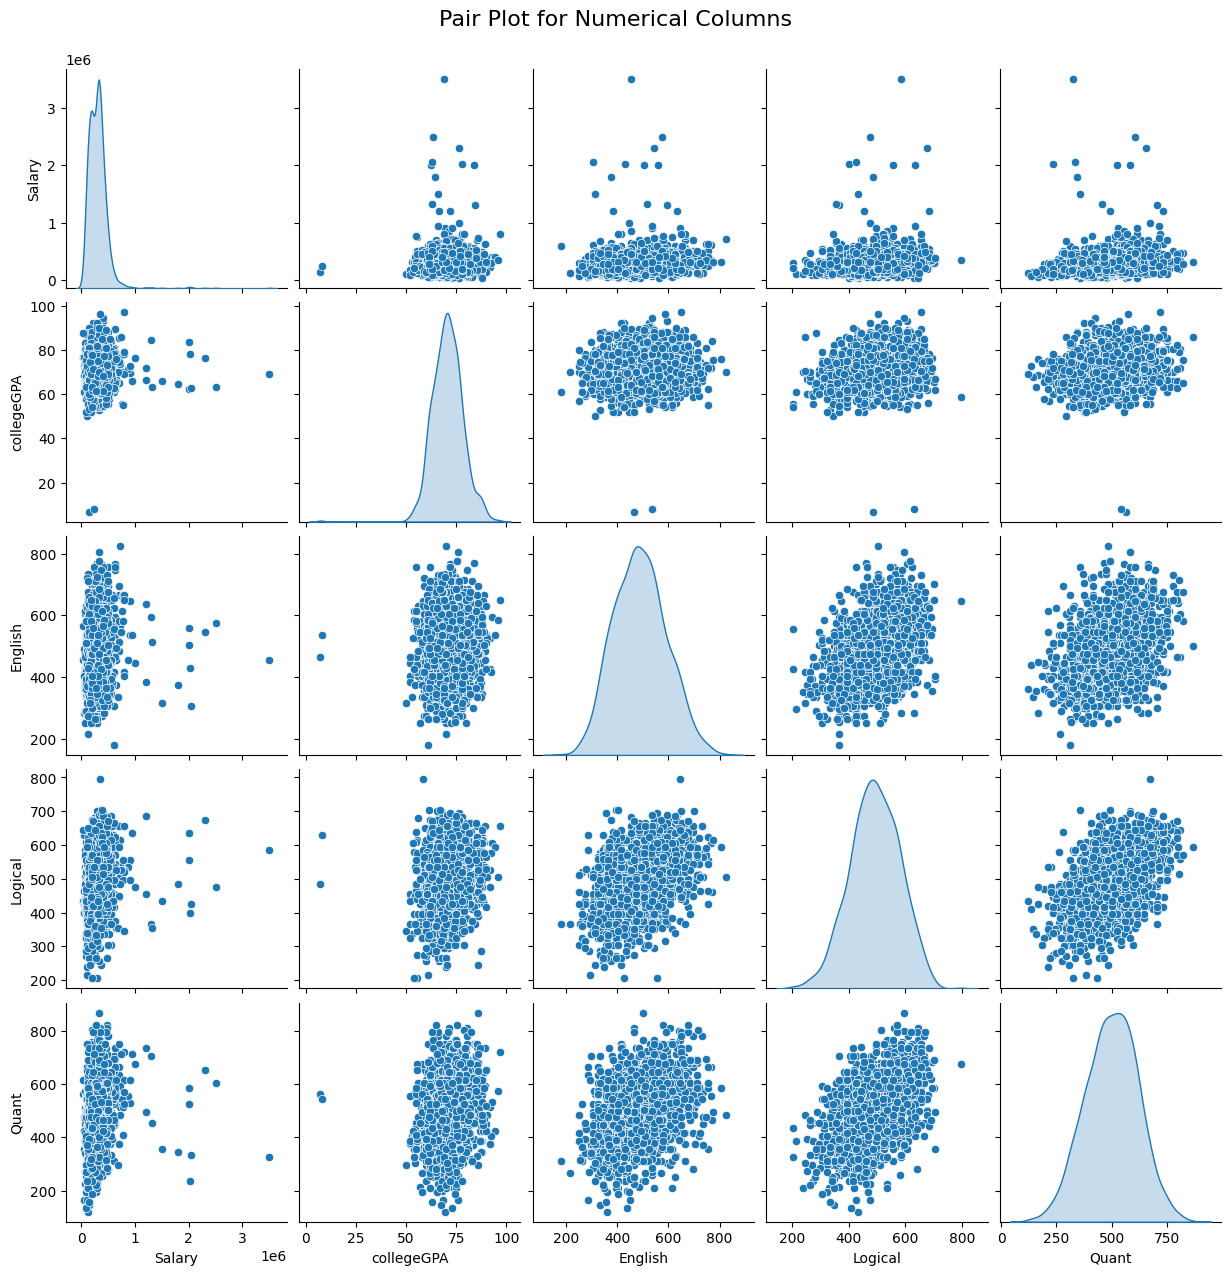

In [36]:
# Example pair plot for numerical columns
sns.pairplot(df[['Salary', 'collegeGPA', 'English', 'Logical', 'Quant']], diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Columns', y=1.02, fontsize=16)
plt.show()


<ipython-input-37-e5af9a975e86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Specialization', y='Salary', data=df, palette='Set2')  # Customize palette if needed
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/

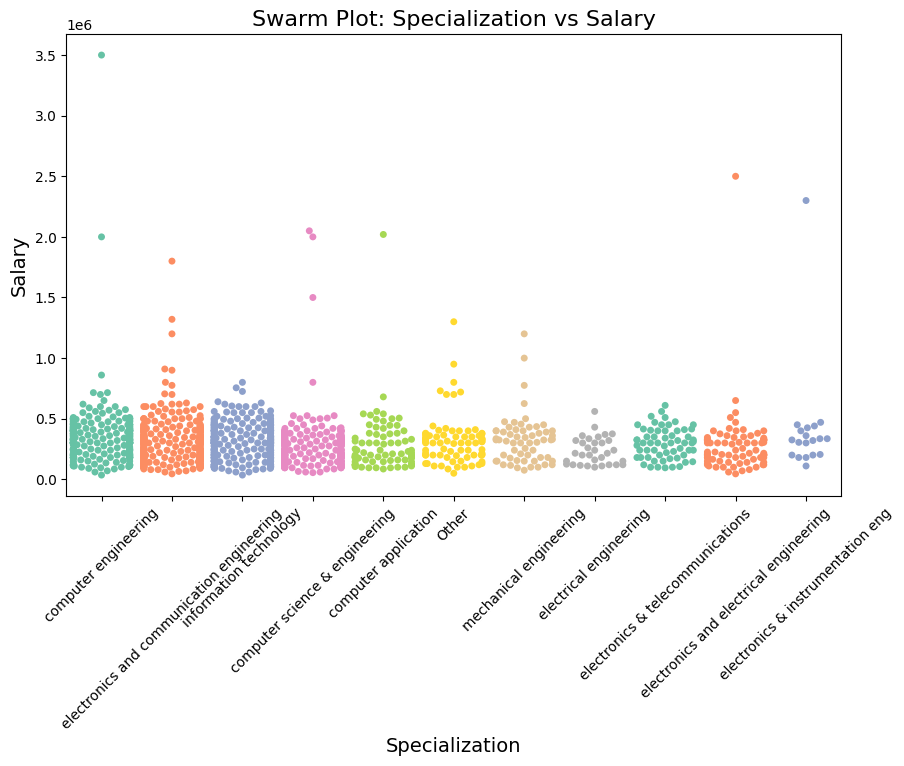

In [37]:
# Example swarm plot for 'Specialization' vs 'Salary'
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Specialization', y='Salary', data=df, palette='Set2')  # Customize palette if needed
plt.title('Swarm Plot: Specialization vs Salary', fontsize=16)
plt.xlabel('Specialization', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


<ipython-input-38-1d077f7f09d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='Set3')  # Customize palette if needed


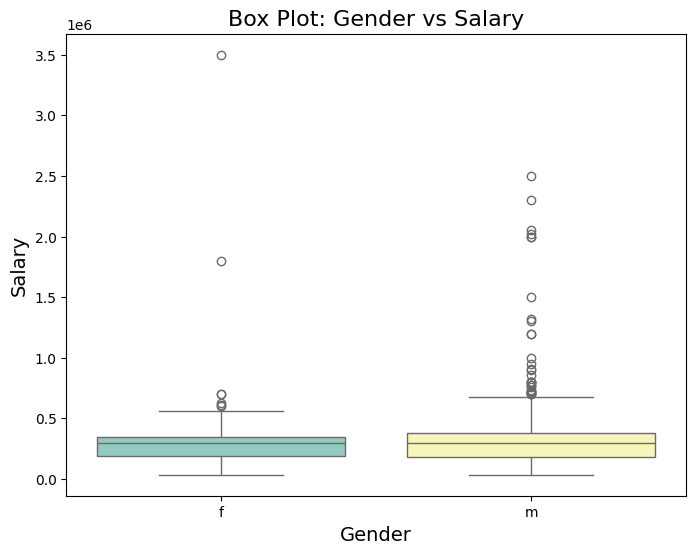

In [38]:
# box plot for 'Gender' vs 'Salary'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set3')  # Customize palette if needed
plt.title('Box Plot: Gender vs Salary', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.show()


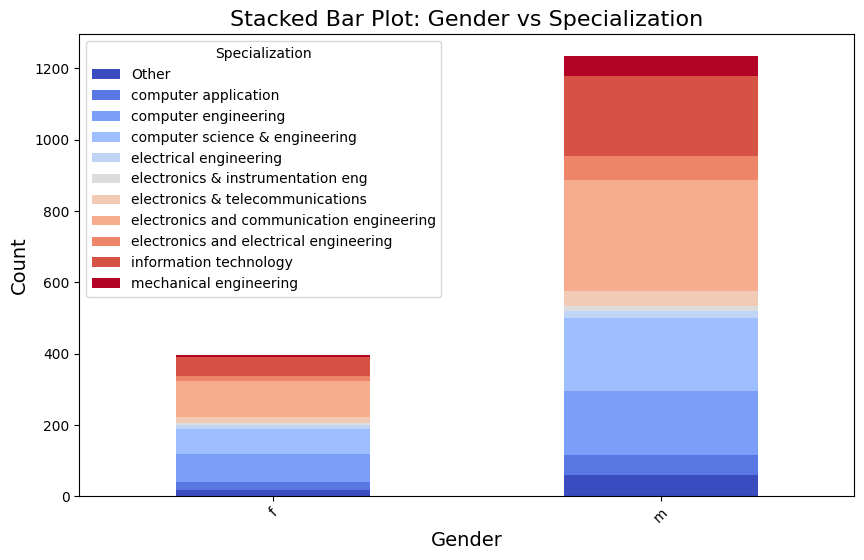

In [39]:
# stacked bar plot for 'Gender' vs 'Specialization'
gender_specialization = df.groupby(['Gender', 'Specialization']).size().unstack()
gender_specialization.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')  # Customize colormap if needed
plt.title('Stacked Bar Plot: Gender vs Specialization', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Specialization')
plt.show()


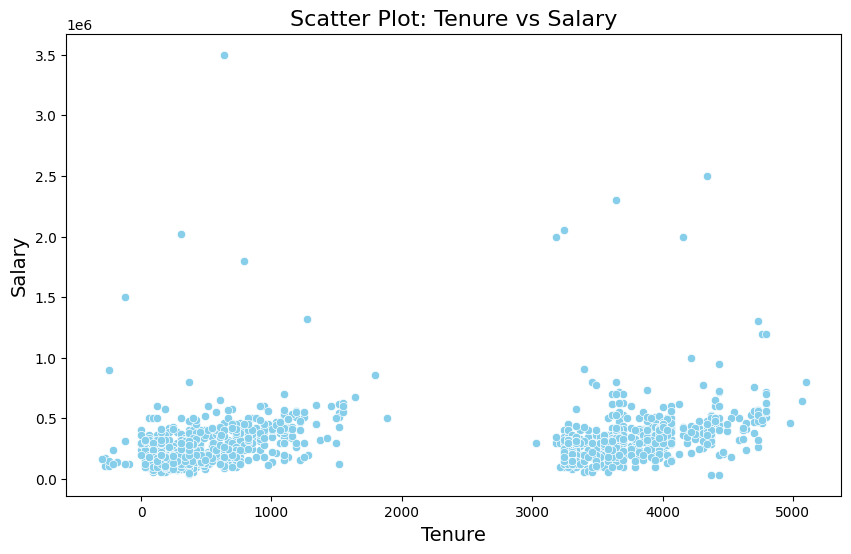

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='Salary', data=df, color='skyblue')
plt.title('Scatter Plot: Tenure vs Salary', fontsize=16)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.show()


<ipython-input-46-10e934c1d0c7>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='JobCity', y='Salary', data=df_top_10_cities, estimator='mean', ci=None, marker='o', color='purple')


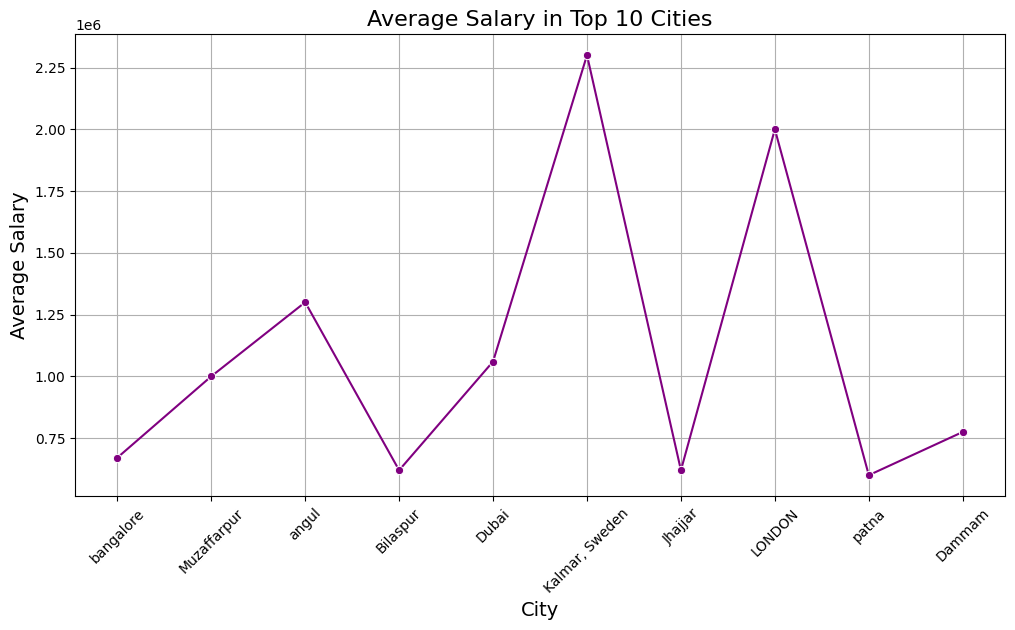

In [46]:
# Calculate the average salary for each city
average_salary_by_city = df.groupby('JobCity')['Salary'].mean()

# Select the top 10 cities based on the average salary
top_10_cities = average_salary_by_city.nlargest(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_10_cities = df[df['JobCity'].isin(top_10_cities)]

# Plot the average salary for each city using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='JobCity', y='Salary', data=df_top_10_cities, estimator='mean', ci=None, marker='o', color='purple')
plt.title('Average Salary in Top 10 Cities', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid lines for better visualization
plt.show()


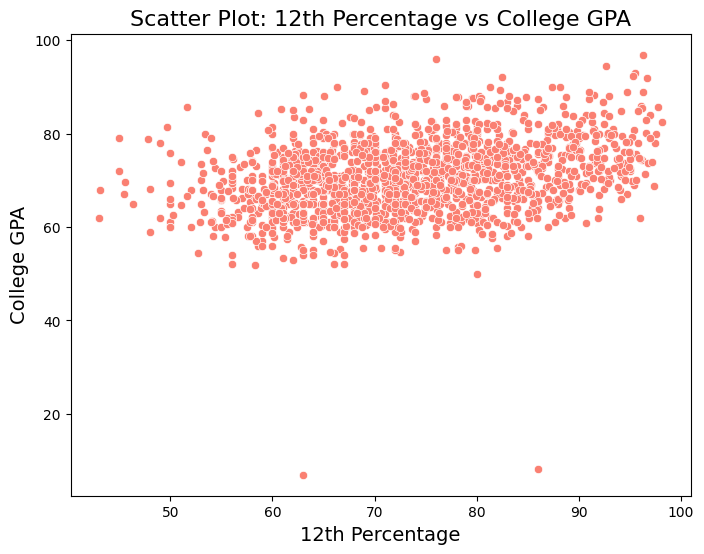

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='12percentage', y='collegeGPA', data=df, color='salmon')
plt.title('Scatter Plot: 12th Percentage vs College GPA', fontsize=16)
plt.xlabel('12th Percentage', fontsize=14)
plt.ylabel('College GPA', fontsize=14)
plt.show()


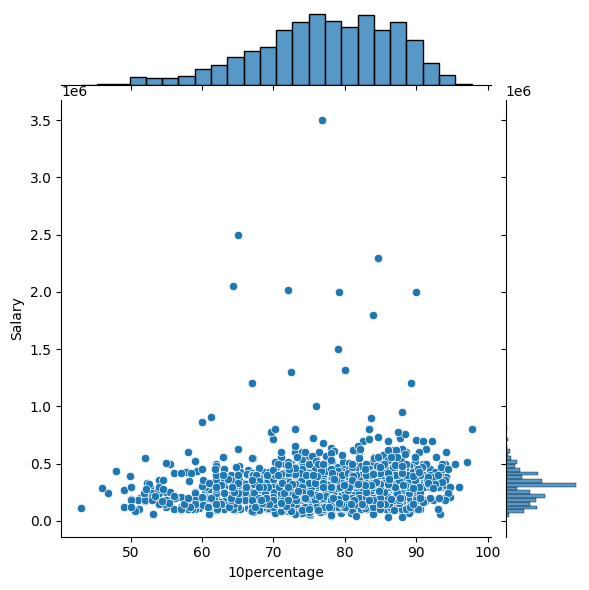

In [51]:
# Plot joint distribution between two numerical variables
sns.jointplot(x='10percentage', y='Salary', data=df, kind='scatter')
plt.title('Jointplot: 10th Percentage vs. Salary', fontsize=16)
plt.show()


<ipython-input-52-fc884a5d6138>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


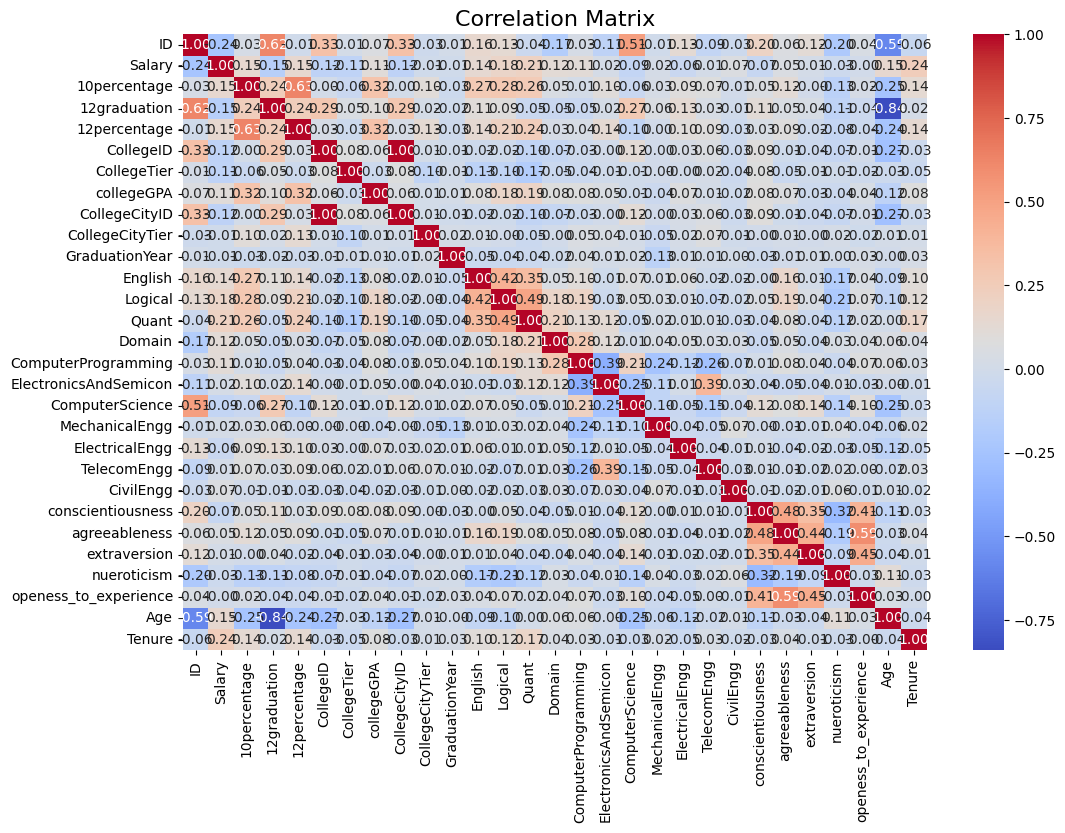

In [52]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [54]:
# 1. Test Salary Range for Computer Science Engineering Graduates
# Filter dataset for Computer Science Engineering graduates with specified job titles
cse_job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
cse_graduates = df[(df['Specialization'] == 'computer science') & (df['Designation'].isin(cse_job_titles))]

# Calculate average salary
average_salary_cse = cse_graduates['Salary'].mean()
print("Average salary for Computer Science Engineering graduates in specified job titles:", average_salary_cse)

# 2. Analyze Relationship between Gender and Specialization
# Use chi-square test for independence
from scipy.stats import chi2_contingency

# Create contingency table for gender and specialization
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Perform chi-square test
chi2, p_val, _, _ = chi2_contingency(contingency_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p_val)


Average salary for Computer Science Engineering graduates in specified job titles: nan
Chi-square test statistic: 26.370750181045366
p-value: 0.0032722797590332303


In [5]:
# Conclusions
# 1. Relationship between gender and specialization
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df['Gender'], df['Specialization']))
print(f"There is a significant relationship between gender and specialization (p-value: {p_value}).")

# Perform chi-square test for the relationship between gender and specialization
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df['Gender'], df['Specialization']))
print(f"Chi-square test statistic: {chi2}")
print(f"p-value: {p_value}")


There is a significant relationship between gender and specialization (p-value: 1.2453868176976918e-06).
Chi-square test statistic: 104.46891913608455
p-value: 1.2453868176976918e-06
